# 2.Clasification

Import important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
#model selection
from sklearn.model_selection import train_test_split

#classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

#Experiment with deeplearning eh multi layer JST
import tensorflow as tf
from tensorflow import keras

sns.set()
%matplotlib inline
classifier = 'svm_test_3'
postfix = '_no_outliers_heatmap'

### Import datasets

In [2]:
df = pd.read_csv('data/main_dataset_no_outliers_v2.csv')
y = df['best_pos']
X = df.drop(['best_pos'], axis=1)
d = joblib.load('data/label_encoder_model_v2.sav')
print(X.shape, y.shape)

(17398, 57) (17398,)


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5, 36.5, 38.5, 40.5, 42.5,
        44.5, 46.5, 48.5, 50.5, 52.5, 54.5, 56.5]),
 <a list of 29 Text yticklabel objects>)

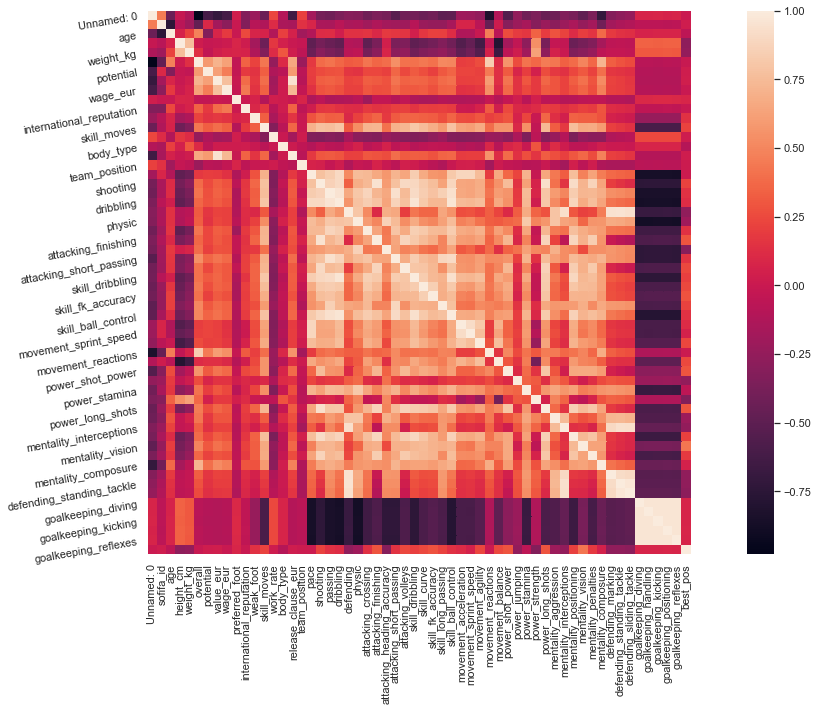

In [3]:
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
plt.figure(figsize=(20, 10))
ax = sns.heatmap(corr, vmax=1, square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=10)

Nice, let's build a dataframe using "Heatmap correlation" feature

In [4]:
corr['best_pos']

Unnamed: 0                    0.003643
sofifa_id                     0.032815
age                          -0.058471
height_cm                    -0.270357
weight_kg                    -0.252414
overall                      -0.008289
potential                     0.031111
value_eur                     0.037022
wage_eur                     -0.002788
preferred_foot                0.080199
international_reputation      0.000987
weak_foot                     0.141833
skill_moves                   0.226393
work_rate                     0.020594
body_type                    -0.093223
release_clause_eur            0.030733
team_position                 0.014313
pace                          0.014349
shooting                      0.220053
passing                       0.144341
dribbling                     0.124996
defending                    -0.265184
physic                       -0.197100
attacking_crossing            0.144924
attacking_finishing           0.289749
attacking_heading_accurac

In [5]:
corr['best_pos'].loc[corr['best_pos']>0].keys() #select feature with corelation more than 0.1 with best_pos

Index(['Unnamed: 0', 'sofifa_id', 'potential', 'value_eur', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'release_clause_eur', 'team_position', 'pace', 'shooting', 'passing',
       'dribbling', 'attacking_crossing', 'attacking_finishing',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_long_shots', 'mentality_positioning',
       'mentality_vision', 'mentality_penalties', 'mentality_composure',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'best_pos'],
      dtype='object')

In [6]:
feature = ['weak_foot', 'skill_moves', 'shooting', 'attacking_crossing',
       'attacking_finishing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'movement_agility', 'movement_balance', 'power_shot_power',
       'power_long_shots', 'mentality_positioning', 'mentality_vision',
       'mentality_penalties', 'goalkeeping_diving', 'goalkeeping_handling',
       'goalkeeping_kicking', 'goalkeeping_positioning',
       'goalkeeping_reflexes',
        'potential', 'overall', 'pace', 'passing', 'dribbling', 'defending', 'physic'] #combine with my previous feature
X = X[feature]
X.head()

,weak_foot,skill_moves,shooting,attacking_crossing,attacking_finishing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,potential,overall,pace,passing,dribbling,defending,physic
0,4,4,89.0,66,89,88,79,78,78,73,...,5,4,4,83,83,69.0,75.0,80.0,30.0,65.0
1,3,3,50.0,25,37,39,65,62,56,77,...,9,13,11,83,83,56.0,61.0,63.0,86.0,82.0
2,2,4,69.0,83,66,75,83,82,46,75,...,15,7,13,82,82,87.0,77.0,83.0,69.0,53.0
3,3,4,77.0,77,77,65,82,67,71,80,...,13,9,8,82,82,81.0,79.0,83.0,46.0,75.0
4,3,3,74.0,90,60,64,80,85,88,77,...,8,16,6,82,82,69.0,81.0,76.0,82.0,79.0


## Clasify

In [7]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10101)

In [8]:
clf = svm.SVC(kernel = 'linear', C = 1, gamma = 'scale')
clf.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
result = clf.predict(X_test)

In [10]:
classes = d['best_pos'].classes_
print(*zip(range(8),classes),sep='\n')

(0, 'Back')
(1, 'Fwd')
(2, 'Goal_Keeper')
(3, 'Mid_Centre')
(4, 'Mid_Side')


In [11]:
d['best_pos'].inverse_transform([2])

array(['Goal_Keeper'], dtype=object)

In [12]:
result = pd.DataFrame(result)
result_inverse = d['best_pos'].inverse_transform(np.ravel(result))

In [13]:
clf.score(X_test,y_test)*100

86.20689655172413

In [14]:
print(classification_report(y_test, result, zero_division=True))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1471
           1       0.82      0.84      0.83       769
           2       1.00      1.00      1.00       423
           3       0.83      0.87      0.85      1162
           4       0.66      0.55      0.60       525

    accuracy                           0.86      4350
   macro avg       0.85      0.84      0.84      4350
weighted avg       0.86      0.86      0.86      4350



In [15]:
report = classification_report(y_test, result, zero_division=True, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.to_csv('output/'+ classifier + postfix +'.csv')

In [16]:
df_report

,precision,recall,f1-score,support
0,0.932569,0.940177,0.936357,1471.000000
1,0.824359,0.836151,0.830213,769.000000
2,1.000000,1.000000,1.000000,423.000000
3,0.826122,0.870912,0.847926,1162.000000
4,0.658314,0.550476,0.599585,525.000000
accuracy,0.862069,0.862069,0.862069,0.862069
macro avg,0.848273,0.839543,0.842816,4350.000000
weighted avg,0.858462,0.862069,0.859515,4350.000000


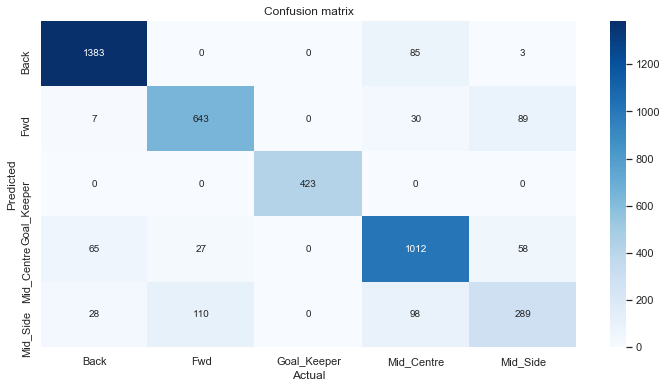

In [17]:
conf_matrix = confusion_matrix(y_test, result)
plt.figure(figsize=(12,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=classes, 
            yticklabels=classes,
            cmap="Blues",
            fmt='d')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [18]:
#save model
joblib.dump(clf,'model/'+ classifier + postfix +'.sav')

['model/svm_test_3_no_outliers_heatmap.sav']

## Cross validation score using K-fold

![Kfold](grid_search_cross_validation.png)

In [19]:
from sklearn.model_selection import cross_validate

In [20]:
cv_result = cross_validate(clf, X_train, y_train, cv=5, scoring=['f1_micro', 'f1_macro', 'f1_weighted', 'accuracy'],return_estimator = True)

In [21]:
cv_result

{'fit_time': array([116.53606319, 117.71032166, 141.2609272 , 145.18380404,
        145.69265914]),
 'score_time': array([0.54806733, 0.43649268, 0.5655508 , 0.66299915, 0.48188877]),
 'estimator': (SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
  SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
  SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
  SVC(C=1, break_ties=F

In [22]:
joblib.dump(cv_result,'model/'+ classifier + postfix +'_cv.sav')

['model/svm_test_3_no_outliers_heatmap_cv.sav']

In [23]:
print('test_accuracy',np.mean(cv_result['test_accuracy'])*100)
print('test_f1_micro',np.mean(cv_result['test_f1_micro'])*100)
print('test_f1_macro',np.mean(cv_result['test_f1_macro'])*100)
print('test_f1_weighted',np.mean(cv_result['test_f1_weighted'])*100)

test_accuracy 86.74121850535063
test_f1_micro 86.74121850535063
test_f1_macro 85.31275461006737
test_f1_weighted 86.64652314138897
